# Importing Required Libraries and Data

In [49]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium --yes 
import folium # map rendering library

print('Libraries imported.')

done

# All requested packages already installed.

done

## Package Plan ##

  environment location: /Users/Suhail/opt/miniconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    jinja2-2.11.2              |     pyh9f0ad1d_0          93 KB  conda-forge
    markupsafe-1.1.1           |   py37h9bfed18_1          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         205 KB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.1-py_0
  folium             conda-forge/noarch::folium-0.11.0-py_0
  jinja2             conda-forge/noarch::jinja2-2.11.2-pyh9f0ad1d_0
  marku

In [48]:
!pip install sklearn
# import k-means from clustering stage
from sklearn.cluster import KMeans

     |████████████████████████████████| 7.4 MB 982 kB/s 
     |████████████████████████████████| 294 kB 2.1 MB/s 
     |████████████████████████████████| 28.4 MB 13.6 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=e204257c9664369e0f54f80fbacf712cc8277f0834972c62a9f3f774ec8353a2
  Stored in directory: /Users/Suhail/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [53]:
orl_neighborhood = pd.read_csv('/Users/Suhail/Desktop/Orlando Neighborhood Housing Prices.csv')
orl_neighborhood['Neighborhoods'].replace('Orlando Central Business District','Downtown', inplace=True)

orl_neighborhood

,Neighborhoods,Median Listing Price,$/SqFt,Homes For Sale,For Rent
0,Metro West,$178K,$136,146,263
1,College Park,$399.5K,$252,126,53
2,Vista East,$300K,$131,51,52
3,Florida Center North,$150K,$130,90,106
4,Lake Nona South,$499.9K,$199,79,48
5,South Semoran,$115K,$123,48,143
6,Baldwin Park,$564.9K,$245,60,60
7,Downtown,$255K,$278,68,66
8,Ventura,$168K,$149,55,25
9,Rosemont,$135.8K,$100,38,35


# Pre-Processing

In [73]:
# Loops through dataframe to find the appropriate coordinates for each neighborhood

orl_latitude = []
orl_longitude = []
for idx, val in enumerate(orl_neighborhood['Neighborhoods']):

    address = '{}, Orlando'.format(val)

    geolocator = Nominatim(user_agent="orl_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
 
    
    orl_latitude.append(location.latitude)
    orl_longitude.append(location.longitude)
    
    
orl_neighborhood['Latitude'] = orl_latitude
orl_neighborhood['Longitude'] = orl_longitude 
print('Done!')

Done!


In [74]:
orl_neighborhood

,Neighborhoods,Median Listing Price,$/SqFt,Homes For Sale,For Rent,Latitude,Longitude
0,Metro West,$178K,136,146,263,28.519226,-81.333090
1,College Park,$399.5K,252,126,53,28.574478,-81.390258
2,Vista East,$300K,131,51,52,28.459393,-81.245251
3,Florida Center North,$150K,130,90,106,28.484958,-81.447864
4,Lake Nona South,$499.9K,199,79,48,28.377325,-81.261730
5,South Semoran,$115K,123,48,143,28.463934,-81.314947
6,Baldwin Park,$564.9K,245,60,60,28.569516,-81.327513
7,Downtown,$255K,278,68,66,28.531441,-81.398494
8,Ventura,$168K,149,55,25,28.509321,-81.296282
9,Rosemont,$135.8K,100,38,35,28.600459,-81.432094


In [75]:
# processes Sqft value to be converted to integer values

orl_neighborhood1 = orl_neighborhood

for idx, val in enumerate(orl_neighborhood1['$/SqFt']):

    orl_neighborhood1['$/SqFt'][idx] = orl_neighborhood1['$/SqFt'][idx].replace('$', '',)
    
print('Done')



Done


In [76]:
orl_neighborhood1.head()

,Neighborhoods,Median Listing Price,$/SqFt,Homes For Sale,For Rent,Latitude,Longitude
0,Metro West,$178K,136,146,263,28.519226,-81.333090
1,College Park,$399.5K,252,126,53,28.574478,-81.390258
2,Vista East,$300K,131,51,52,28.459393,-81.245251
3,Florida Center North,$150K,130,90,106,28.484958,-81.447864
4,Lake Nona South,$499.9K,199,79,48,28.377325,-81.261730


In [78]:
# finds coordinates for map visualization
address = 'Orlando, Florida'
geolocator = Nominatim(user_agent="orl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# Foursquare Data Fetching and Parsing

In [79]:
# Foursquare Credentials 

CLIENT_ID = '45RXRQO11IQOCBGK4KGS2ZVQC2ONFWHG2LZEKFQPIHR2NU2G' # your Foursquare ID
CLIENT_SECRET = 'CQ3I4ODJBY1GW5JNYZM0JVKQHG5J0VDU14ORFB0N5U2G1R3A' # your Foursquare Secret
VERSION = '20191231' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

Your credentails:
CLIENT_ID: 45RXRQO11IQOCBGK4KGS2ZVQC2ONFWHG2LZEKFQPIHR2NU2G
CLIENT_SECRET:CQ3I4ODJBY1GW5JNYZM0JVKQHG5J0VDU14ORFB0N5U2G1R3A


In [80]:
# Fetches categories for each venue from Foursquare

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [81]:
# Fetches information on nearby venues from Foursquare for each neighborhood

def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [82]:
# uses dataframe to fetch venues for each neighborhood

orlando_venues = getNearbyVenues(names=orl_neighborhood['Neighborhoods'],
                                   latitudes=orl_neighborhood['Latitude'],
                                   longitudes=orl_neighborhood['Longitude']
                                  )
print('Done!')

Metro West
College Park
Vista East
Florida Center North
Lake Nona South
South Semoran
Baldwin Park
Downtown
Ventura
Rosemont
Colonialtown North
Engelwood Park
Lake Nona Central
Storey Park
Northlake Park at Lake Nona
Wadeview Park
Kirkman South
Bryn Mawr
East Park
South Eola
Done!


In [83]:
print(orlando_venues.shape)
orlando_venues.head()

(1827, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Metro West,28.519226,-81.33309,Pizza Bruno,28.523953,-81.335410,Pizza Place
1,Metro West,28.519226,-81.33309,Keke's Breakfast Café,28.522006,-81.329128,Bistro
2,Metro West,28.519226,-81.33309,Zaza New Cuban Diner,28.524099,-81.340018,Cuban Restaurant
3,Metro West,28.519226,-81.33309,Firehouse Subs,28.512997,-81.328484,Sandwich Place
4,Metro West,28.519226,-81.33309,Twistee Treat Curry Ford,28.523811,-81.328860,Ice Cream Shop


# Data Processing

In [84]:
# Counts number of venues returned by neighborhood
orlando_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Baldwin Park,100,100,100,100,100,100
Bryn Mawr,100,100,100,100,100,100
College Park,100,100,100,100,100,100
Colonialtown North,100,100,100,100,100,100
Downtown,100,100,100,100,100,100
East Park,93,93,93,93,93,93
Engelwood Park,97,97,97,97,97,97
Florida Center North,100,100,100,100,100,100
Kirkman South,100,100,100,100,100,100


In [85]:
print('There are {} uniques categories.'.format(len(orlando_venues['Venue Category'].unique())))

There are 205 uniques categories.


In [86]:
# one hot encoding
orlando_onehot = pd.get_dummies(orlando_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
orlando_onehot['Neighborhood'] = orlando_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [orlando_onehot.columns[-1]] + list(orlando_onehot.columns[:-1])
orlando_onehot = orlando_onehot[fixed_columns]

orlando_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Duty-free Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health Food Store,Hobby Shop,Hockey Arena,Hot Dog Joint,Hotel,Housing Development,Ice Cream Shop,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Library,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Repair Shop,Outlet Mall,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Resort,Rest Area,Restaurant,Roller Rink,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trade School,Trail,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Metro West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Metro West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Metro West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [87]:
orlando_grouped = orlando_onehot.groupby('Neighborhood').mean().reset_index()
orlando_grouped

,Neighborhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Duty-free Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health Food Store,Hobby Shop,Hockey Arena,Hot Dog Joint,Hotel,Housing Development,Ice Cream Shop,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Library,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Repair Shop,Outlet Mall,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Resort,Rest Area,Restaurant,Roller Rink,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trade School,Trail,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Baldwin Park,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.020000,0.00,0.00,0.02,0.030000,0.000000,0.00,0.010000,0.00,0.040000,0.000000,0.020000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.010000,0.000000,0.00,0.00,0.000000,0.01,0.00,0.010000,0.010000,0.00,0.000000,0.00,0.030000,0.02,0.000000,0.010000,0.000000,0.010000,0.00,0.010000,0.040000,0.00,0.010000,0.000000,0.000000,0.020000,0.000000,0.000000,0.030000,0.01,0.000000,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.020000,0.00,0.00,0.010000,0.000000,0.020000,0.00,0.010000,0.000000,0.000000,0.000000,0.00,0.01,0.01,0.000000,0.01,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.020000,0.02,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.010000,0.010000,0.000000,0.010000,0.000000,0.030000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.010000,0.000000,0.00,0.010000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.010000,0.01,0.010000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.070000,0.00,0.000000,0.0

In [88]:
# checks the first five highest venue cateogry frequencies for each neighborhood

num_top_venues = 5

for hood in orlando_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = orlando_grouped[orlando_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baldwin Park----
                           venue  freq
0                           Park  0.07
1  Vegetarian / Vegan Restaurant  0.04
2                         Bakery  0.04
3                    Coffee Shop  0.04
4             Italian Restaurant  0.03


----Bryn Mawr----
                venue  freq
0   Convenience Store  0.07
1  Mexican Restaurant  0.06
2                Park  0.05
3  Italian Restaurant  0.04
4       Grocery Store  0.04


----College Park----
                 venue  freq
0        Grocery Store  0.05
1                 Café  0.04
2          Coffee Shop  0.04
3  American Restaurant  0.04
4       Sandwich Place  0.03


----Colonialtown North----
              venue  freq
0              Park  0.08
1       Coffee Shop  0.04
2  Sushi Restaurant  0.03
3    Sandwich Place  0.03
4              Café  0.03


----Downtown----
            venue  freq
0            Park  0.08
1   Grocery Store  0.06
2  Sandwich Place  0.04
3            Café  0.03
4     Pizza Place  0.03


----East P

In [89]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [90]:
# finds top ten most common venues in each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
orl_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
orl_neighborhoods_venues_sorted['Neighborhood'] = orlando_grouped['Neighborhood']

for ind in np.arange(orlando_grouped.shape[0]):
    orl_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(orlando_grouped.iloc[ind, :], num_top_venues)

orl_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baldwin Park,Park,Coffee Shop,Bakery,Vegetarian / Vegan Restaurant,Café,Cuban Restaurant,Sandwich Place,Italian Restaurant,Asian Restaurant,Bar
1,Bryn Mawr,Convenience Store,Mexican Restaurant,Park,Italian Restaurant,Pizza Place,Grocery Store,Ice Cream Shop,Sandwich Place,Breakfast Spot,Vegetarian / Vegan Restaurant
2,College Park,Grocery Store,American Restaurant,Café,Coffee Shop,Italian Restaurant,Asian Restaurant,Seafood Restaurant,Bar,Sandwich Place,Park
3,Colonialtown North,Park,Coffee Shop,Bar,Sushi Restaurant,Sandwich Place,Grocery Store,Vegetarian / Vegan Restaurant,Café,Theater,American Restaurant
4,Downtown,Park,Grocery Store,Sandwich Place,Café,Sporting Goods Shop,Pizza Place,Coffee Shop,Tex-Mex Restaurant,Mexican Restaurant,Playground


In [91]:
# set number of clusters
kclusters = 5

orlando_grouped_clustering = orlando_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(orlando_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 0, 0, 0, 3, 4, 2, 2, 3], dtype=int32)

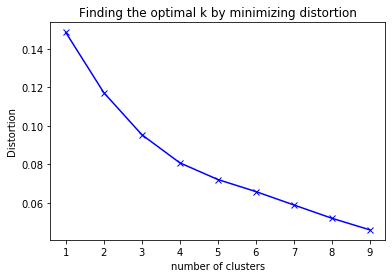

In [92]:
# finds k value that minimizes distortion

from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(orlando_grouped_clustering)
    kmeanModel.fit(orlando_grouped_clustering)
    distortions.append(sum(np.min(cdist(orlando_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / orlando_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.title('Finding the optimal k by minimizing distortion')
plt.show()

In [93]:
orl_merged = orl_neighborhood

# merges dataframes to add latitude/longitude for each neighborhood
orl_merged = orl_merged.join(orl_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhoods')

orl_merged.head()

,Neighborhoods,Median Listing Price,$/SqFt,Homes For Sale,For Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Metro West,$178K,136,146,263,28.519226,-81.333090,Park,Convenience Store,Italian Restaurant,Mexican Restaurant,Café,Cosmetics Shop,Sandwich Place,American Restaurant,Bar,Bakery
1,College Park,$399.5K,252,126,53,28.574478,-81.390258,Grocery Store,American Restaurant,Café,Coffee Shop,Italian Restaurant,Asian Restaurant,Seafood Restaurant,Bar,Sandwich Place,Park
2,Vista East,$300K,131,51,52,28.459393,-81.245251,Convenience Store,Pizza Place,Gym / Fitness Center,Fast Food Restaurant,Pharmacy,Video Store,Discount Store,Donut Shop,Toll Plaza,Bank
3,Florida Center North,$150K,130,90,106,28.484958,-81.447864,Theme Park Ride / Attraction,Furniture / Home Store,Clothing Store,Hotel,Pizza Place,Theme Park,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Sporting Goods Shop
4,Lake Nona South,$499.9K,199,79,48,28.377325,-81.261730,Fast Food Restaurant,Sandwich Place,Convenience Store,Pizza Place,Golf Course,New American Restaurant,Italian Restaurant,Shipping Store,Grocery Store,Gym / Fitness Center


In [94]:
# add clustering labels
orl_merged.insert(0, 'Cluster Labels', kmeans.labels_)

In [95]:
orl_merged

,Cluster Labels,Neighborhoods,Median Listing Price,$/SqFt,Homes For Sale,For Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Metro West,$178K,136,146,263,28.519226,-81.333090,Park,Convenience Store,Italian Restaurant,Mexican Restaurant,Café,Cosmetics Shop,Sandwich Place,American Restaurant,Bar,Bakery
1,4,College Park,$399.5K,252,126,53,28.574478,-81.390258,Grocery Store,American Restaurant,Café,Coffee Shop,Italian Restaurant,Asian Restaurant,Seafood Restaurant,Bar,Sandwich Place,Park
2,0,Vista East,$300K,131,51,52,28.459393,-81.245251,Convenience Store,Pizza Place,Gym / Fitness Center,Fast Food Restaurant,Pharmacy,Video Store,Discount Store,Donut Shop,Toll Plaza,Bank
3,0,Florida Center North,$150K,130,90,106,28.484958,-81.447864,Theme Park Ride / Attraction,Furniture / Home Store,Clothing Store,Hotel,Pizza Place,Theme Park,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Sporting Goods Shop
4,0,Lake Nona South,$499.9K,199,79,48,28.377325,-81.261730,Fast Food Restaurant,Sandwich Place,Convenience Store,Pizza Place,Golf Course,New American Restaurant,Italian Restaurant,Shipping Store,Grocery Store,Gym / Fitness Center
5,3,South Semoran,$115K,123,48,143,28.463934,-81.314947,Hotel,Discount Store,Mexican Restaurant,Convenience Store,Coffee Shop,Park,Fast Food Restaurant,Steakhouse,Grocery Store,American Restaurant
6,4,Baldwin Park,$564.9K,245,60,60,28.569516,-81.327513,Park,Coffee Shop,Bakery,Vegetarian / Vegan Restaurant,Café,Cuban Restaurant,Sandwich Place,Italian Restaurant,Asian Restaurant,Bar
7,2,Downtown,$255K,278,68,66,28.531441,-81.398494,Park,Grocery Store,Sandwich Place,Café,Sporting Goods Shop,Pizza Place,Coffee Shop,Tex-Mex Restaurant,Mexican Restaurant,Playground
8,2,Ventura,$168K,149,55,25,28.509321,-81.296282,Italian Restaurant,Pizza Place,Convenience Store,Grocery Store,Mexican Restaurant,Breakfast Spot,Coffee Shop,Discount Store,Cosmetics Shop,Fast Food Restaurant
9,3,Rosemont,$135.8K,100,38,35,28.600459,-81.432094,Convenience Store,Sandwich Place,Pizza Place,Pharmacy,Discount Store,Video Store,Fast Food Restaurant,Fried Chicken Joint,Grocery Store,Caribbean Restaurant


In [96]:
# seperates neighborhoods into respective clusters

orl_cluster_0 = orl_merged.loc[orl_merged['Cluster Labels'] == 0, orl_merged.columns[[1] + list(range(2, orl_merged.shape[1]))]]
orl_cluster_1 = orl_merged.loc[orl_merged['Cluster Labels'] == 1, orl_merged.columns[[1] + list(range(2, orl_merged.shape[1]))]]
orl_cluster_2 = orl_merged.loc[orl_merged['Cluster Labels'] == 2, orl_merged.columns[[1] + list(range(2, orl_merged.shape[1]))]]
orl_cluster_3 = orl_merged.loc[orl_merged['Cluster Labels'] == 3, orl_merged.columns[[1] + list(range(2, orl_merged.shape[1]))]]
orl_cluster_4 = orl_merged.loc[orl_merged['Cluster Labels'] == 4, orl_merged.columns[[1] + list(range(2, orl_merged.shape[1]))]]

orl_cluster_0.reset_index(drop=True,inplace=True)
orl_cluster_1.reset_index(drop=True,inplace=True)
orl_cluster_2.reset_index(drop=True,inplace=True)
orl_cluster_3.reset_index(drop=True,inplace=True)
orl_cluster_4.reset_index(drop=True,inplace=True)

In [97]:
# further cluster labelling

orl_clustername = []

for idx, val in enumerate(orl_merged['Cluster Labels']):
    
    if val == 0:
        orl_clustername.append('Restaurants and Parks')
    elif val == 1:
        orl_clustername.append('Restaurants and Community Services')
    elif val == 2:
        orl_clustername.append('Theme Parks')
    elif val == 3:
        orl_clustername.append('Restaurants and Stores')
    elif val == 4:
        orl_clustername.append('Mixed Use')
    
    
orl_merged['Cluster Name'] = orl_clustername
print('Done!')           

Done!


In [159]:
orl_cluster_0.head()

,Neighborhoods,Median Listing Price,$/SqFt,Homes For Sale,For Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Name,Price per SqFt Category
0,Metro West,$178K,136,146,263,28.516500,-81.469300,Park,Convenience Store,Italian Restaurant,Mexican Restaurant,Café,Cosmetics Shop,Sandwich Place,American Restaurant,Bar,Bakery,Restaurants and Parks,Low
1,Vista East,$300K,131,51,52,28.468600,-81.267700,Convenience Store,Pizza Place,Gym / Fitness Center,Fast Food Restaurant,Pharmacy,Video Store,Discount Store,Donut Shop,Toll Plaza,Bank,Restaurants and Parks,Low
2,Florida Center North,$150K,130,90,106,28.484958,-81.447864,Theme Park Ride / Attraction,Furniture / Home Store,Clothing Store,Hotel,Pizza Place,Theme Park,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Sporting Goods Shop,Restaurants and Parks,Low
3,Lake Nona South,$499.9K,199,79,48,28.377325,-81.261730,Fast Food Restaurant,Sandwich Place,Convenience Store,Pizza Place,Golf Course,New American Restaurant,Italian Restaurant,Shipping Store,Grocery Store,Gym / Fitness Center,Restaurants and Parks,Average
4,Engelwood Park,$164.9K,137,27,29,28.531717,-81.299230,Convenience Store,Grocery Store,Italian Restaurant,Pizza Place,Discount Store,Mexican Restaurant,Vietnamese Restaurant,Video Store,Pharmacy,Park,Restaurants and Parks,Low


# Map Visualization Processing

In [138]:
# orlando geojson file
!pip install wget
import wget
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/orlando.geojson'
orlando = wget.download(url)
orl_geo = orlando # geojson file
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [140]:
import json

with open(orl_geo) as f:
    orl_geo_df = json.load(f)

In [162]:
merger = []

for idx, val in enumerate(orl_geo_df['features']):
    merger.append(orl_geo_df['features'][idx]['properties']['name'])
           
print('Done')

Done


In [101]:
# merges neighborhoods without data into a single dataframe

orl_sqft = orl_neighborhood1
orl_sqft.drop(columns=['Homes For Sale'], axis = 1, inplace=True)

In [163]:
merger_s=pd.Series(merger)

In [164]:
merger_df=pd.DataFrame(merger_s, columns=['Neighborhoods'])
merger_df['$/SqFt'] = np.nan
merger_df

,Neighborhoods,$/SqFt
0,Park Central,NaN
1,Lake Fairview,NaN
2,Lake Holden,NaN
3,Pershing,NaN
4,Azalea Park,NaN
5,Bryn Mawr,NaN
6,Callahan,NaN
7,Ventura,NaN
8,Wedgewood Groves,NaN
9,Crescent Park,NaN


In [165]:
merger_df.count()

Neighborhoods    121
$/SqFt             0
dtype: int64

In [104]:
orl_sqft = orl_sqft.append(merger_df, ignore_index=True)

In [105]:
orl_sqft

,Neighborhoods,Median Listing Price,$/SqFt,For Rent,Latitude,Longitude
0,Metro West,$178K,136,263.0,28.519226,-81.333090
1,College Park,$399.5K,252,53.0,28.574478,-81.390258
2,Vista East,$300K,131,52.0,28.459393,-81.245251
3,Florida Center North,$150K,130,106.0,28.484958,-81.447864
4,Lake Nona South,$499.9K,199,48.0,28.377325,-81.261730
5,South Semoran,$115K,123,143.0,28.463934,-81.314947
6,Baldwin Park,$564.9K,245,60.0,28.569516,-81.327513
7,Downtown,$255K,278,66.0,28.531441,-81.398494
8,Ventura,$168K,149,25.0,28.509321,-81.296282
9,Rosemont,$135.8K,100,35.0,28.600459,-81.432094


In [106]:
orl_sqft.drop(columns=['For Rent','Latitude','Longitude'], inplace = True)

In [107]:
orl_sqft['$/SqFt'] = orl_sqft['$/SqFt'].astype(float)
orl_merged['$/SqFt'] = orl_merged['$/SqFt'].astype(int)

In [108]:
orl_sqft.dtypes

Neighborhoods            object
Median Listing Price     object
$/SqFt                  float64
dtype: object

# Cluster Analysis

In [109]:
bins = np.linspace(min(orl_merged["$/SqFt"]), max(orl_merged["$/SqFt"]), 4)
bins

array([100.        , 159.33333333, 218.66666667, 278.        ])

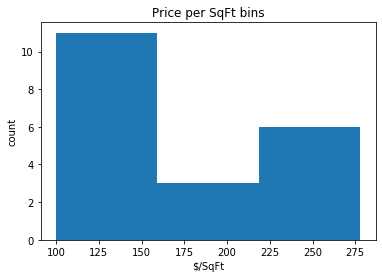

In [160]:
# plots bin split for $/SqFt

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(orl_merged["$/SqFt"],bins=3)

# set x/y labels and plot title
plt.pyplot.xlabel("$/SqFt")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price per SqFt bins")
plt.pyplot.savefig('books_read.png')

In [147]:
# adds price category to merged dataframe

category_names = ['Low','Average','High']
orl_merged['Price per SqFt Category'] = pd.cut(orl_merged['$/SqFt'], bins, labels=category_names, include_lowest=True )

,Cluster Labels,Neighborhoods,Median Listing Price,$/SqFt,Homes For Sale,For Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Name,Price per SqFt Category
0,0,Metro West,$178K,136,146,263,28.519226,-81.333090,Park,Convenience Store,Italian Restaurant,Mexican Restaurant,Café,Cosmetics Shop,Sandwich Place,American Restaurant,Bar,Bakery,Restaurants and Parks,Low
1,4,College Park,$399.5K,252,126,53,28.574478,-81.390258,Grocery Store,American Restaurant,Café,Coffee Shop,Italian Restaurant,Asian Restaurant,Seafood Restaurant,Bar,Sandwich Place,Park,Mixed Use,High
2,0,Vista East,$300K,131,51,52,28.459393,-81.245251,Convenience Store,Pizza Place,Gym / Fitness Center,Fast Food Restaurant,Pharmacy,Video Store,Discount Store,Donut Shop,Toll Plaza,Bank,Restaurants and Parks,Low
3,0,Florida Center North,$150K,130,90,106,28.484958,-81.447864,Theme Park Ride / Attraction,Furniture / Home Store,Clothing Store,Hotel,Pizza Place,Theme Park,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Sporting Goods Shop,Restaurants and Parks,Low
4,0,Lake Nona South,$499.9K,199,79,48,28.377325,-81.261730,Fast Food Restaurant,Sandwich Place,Convenience Store,Pizza Place,Golf Course,New American Restaurant,Italian Restaurant,Shipping Store,Grocery Store,Gym / Fitness Center,Restaurants and Parks,Average
5,3,Airport North,$115K,123,48,143,28.463934,-81.314947,Hotel,Discount Store,Mexican Restaurant,Convenience Store,Coffee Shop,Park,Fast Food Restaurant,Steakhouse,Grocery Store,American Restaurant,Restaurants and Stores,Low
6,4,Baldwin Park,$564.9K,245,60,60,28.569516,-81.327513,Park,Coffee Shop,Bakery,Vegetarian / Vegan Restaurant,Café,Cuban Restaurant,Sandwich Place,Italian Restaurant,Asian Restaurant,Bar,Mixed Use,High
7,2,Downtown,$255K,278,68,66,28.531441,-81.398494,Park,Grocery Store,Sandwich Place,Café,Sporting Goods Shop,Pizza Place,Coffee Shop,Tex-Mex Restaurant,Mexican Restaurant,Playground,Theme Parks,High
8,2,Ventura,$168K,149,55,25,28.509321,-81.296282,Italian Restaurant,Pizza Place,Convenience Store,Grocery Store,Mexican Restaurant,Breakfast Spot,Coffee Shop,Discount Store,Cosmetics Shop,Fast Food Restaurant,Theme Parks,Low
9,3,Rosemont,$135.8K,100,38,35,28.600459,-81.432094,Convenience Store,Sandwich Place,Pizza Place,Pharmacy,Discount Store,Video Store,Fast Food Restaurant,Fried Chicken Joint,Grocery Store,Caribbean Restaurant,Restaurants and Stores,Low


In [153]:
# correcting coordinates and neighborhood names to match geojson file for accurate representation

orl_merged['Neighborhoods'][5] = 'Airport North'
orl_merged['Neighborhoods'][7] = 'Central Business District'

orl_merged['Latitude'][0] = 28.5165
orl_merged['Longitude'][0] = -81.4693
orl_merged['Latitude'][19] = 28.5429
orl_merged['Longitude'][19] = -81.3716
orl_merged['Latitude'][7] = 28.5492
orl_merged['Longitude'][7] = -81.3798
orl_merged['Latitude'][2] = 28.4686
orl_merged['Longitude'][2] = -81.2677

orl_merged

,Cluster Labels,Neighborhoods,Median Listing Price,$/SqFt,Homes For Sale,For Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Name,Price per SqFt Category
0,0,Metro West,$178K,136,146,263,28.516500,-81.469300,Park,Convenience Store,Italian Restaurant,Mexican Restaurant,Café,Cosmetics Shop,Sandwich Place,American Restaurant,Bar,Bakery,Restaurants and Parks,Low
1,4,College Park,$399.5K,252,126,53,28.574478,-81.390258,Grocery Store,American Restaurant,Café,Coffee Shop,Italian Restaurant,Asian Restaurant,Seafood Restaurant,Bar,Sandwich Place,Park,Mixed Use,High
2,0,Vista East,$300K,131,51,52,28.468600,-81.267700,Convenience Store,Pizza Place,Gym / Fitness Center,Fast Food Restaurant,Pharmacy,Video Store,Discount Store,Donut Shop,Toll Plaza,Bank,Restaurants and Parks,Low
3,0,Florida Center North,$150K,130,90,106,28.484958,-81.447864,Theme Park Ride / Attraction,Furniture / Home Store,Clothing Store,Hotel,Pizza Place,Theme Park,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Sporting Goods Shop,Restaurants and Parks,Low
4,0,Lake Nona South,$499.9K,199,79,48,28.377325,-81.261730,Fast Food Restaurant,Sandwich Place,Convenience Store,Pizza Place,Golf Course,New American Restaurant,Italian Restaurant,Shipping Store,Grocery Store,Gym / Fitness Center,Restaurants and Parks,Average
5,3,Airport North,$115K,123,48,143,28.463934,-81.314947,Hotel,Discount Store,Mexican Restaurant,Convenience Store,Coffee Shop,Park,Fast Food Restaurant,Steakhouse,Grocery Store,American Restaurant,Restaurants and Stores,Low
6,4,Baldwin Park,$564.9K,245,60,60,28.569516,-81.327513,Park,Coffee Shop,Bakery,Vegetarian / Vegan Restaurant,Café,Cuban Restaurant,Sandwich Place,Italian Restaurant,Asian Restaurant,Bar,Mixed Use,High
7,2,Central Business District,$255K,278,68,66,28.549200,-81.379800,Park,Grocery Store,Sandwich Place,Café,Sporting Goods Shop,Pizza Place,Coffee Shop,Tex-Mex Restaurant,Mexican Restaurant,Playground,Theme Parks,High
8,2,Ventura,$168K,149,55,25,28.509321,-81.296282,Italian Restaurant,Pizza Place,Convenience Store,Grocery Store,Mexican Restaurant,Breakfast Spot,Coffee Shop,Discount Store,Cosmetics Shop,Fast Food Restaurant,Theme Parks,Low
9,3,Rosemont,$135.8K,100,38,35,28.600459,-81.432094,Convenience Store,Sandwich Place,Pizza Place,Pharmacy,Discount Store,Video Store,Fast Food Restaurant,Fried Chicken Joint,Grocery Store,Caribbean Restaurant,Restaurants and Stores,Low


In [157]:
# splits neighborhoods into respective clusters again

orl_cluster_0 = orl_merged.loc[orl_merged['Cluster Labels'] == 0, orl_merged.columns[[1] + list(range(2, orl_merged.shape[1]))]]
orl_cluster_1 = orl_merged.loc[orl_merged['Cluster Labels'] == 1, orl_merged.columns[[1] + list(range(2, orl_merged.shape[1]))]]
orl_cluster_2 = orl_merged.loc[orl_merged['Cluster Labels'] == 2, orl_merged.columns[[1] + list(range(2, orl_merged.shape[1]))]]
orl_cluster_3 = orl_merged.loc[orl_merged['Cluster Labels'] == 3, orl_merged.columns[[1] + list(range(2, orl_merged.shape[1]))]]
orl_cluster_4 = orl_merged.loc[orl_merged['Cluster Labels'] == 4, orl_merged.columns[[1] + list(range(2, orl_merged.shape[1]))]]

orl_cluster_0.reset_index(drop=True,inplace=True)
orl_cluster_1.reset_index(drop=True,inplace=True)
orl_cluster_2.reset_index(drop=True,inplace=True)
orl_cluster_3.reset_index(drop=True,inplace=True)
orl_cluster_4.reset_index(drop=True,inplace=True)

In [158]:
# counts neighborhoods in each price cateogry in each cluster and drops irrelevant columns

orl_cluster0_price_cat = orl_cluster_0.groupby('Price per SqFt Category').count()
orl_cluster1_price_cat = orl_cluster_1.groupby('Price per SqFt Category').count()
orl_cluster2_price_cat = orl_cluster_2.groupby('Price per SqFt Category').count()
orl_cluster3_price_cat = orl_cluster_3.groupby('Price per SqFt Category').count()
orl_cluster4_price_cat = orl_cluster_4.groupby('Price per SqFt Category').count()

orl_cluster0_price_cat.drop(columns=['$/SqFt','Homes For Sale','For Rent','Latitude','Longitude','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue','Cluster Name'],axis = 1,inplace=True)
orl_cluster1_price_cat.drop(columns=['$/SqFt','Homes For Sale','For Rent','Latitude','Longitude','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue','Cluster Name'],axis = 1,inplace=True)
orl_cluster2_price_cat.drop(columns=['$/SqFt','Homes For Sale','For Rent','Latitude','Longitude','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue','Cluster Name'],axis = 1,inplace=True)
orl_cluster3_price_cat.drop(columns=['$/SqFt','Homes For Sale','For Rent','Latitude','Longitude','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue','Cluster Name'],axis = 1,inplace=True)
orl_cluster4_price_cat.drop(columns=['$/SqFt','Homes For Sale','For Rent','Latitude','Longitude','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue','Cluster Name'],axis = 1,inplace=True)
                                     
                                     
                                     
                                     

In [114]:
orl_cluster0_price_cat.head()

,Neighborhoods,Median Listing Price
Price per SqFt Category,,
Low,4,4
Average,1,1
High,1,1


In [115]:
orl_cluster1_price_cat.head()

,Neighborhoods,Median Listing Price
Price per SqFt Category,,
Low,1,1
Average,0,0
High,0,0


In [116]:
orl_cluster2_price_cat.head()

,Neighborhoods,Median Listing Price
Price per SqFt Category,,
Low,1,1
Average,0,0
High,1,1


In [117]:
orl_cluster3_price_cat.head()

,Neighborhoods,Median Listing Price
Price per SqFt Category,,
Low,3,3
Average,2,2
High,1,1


In [118]:
orl_cluster4_price_cat.head()

,Neighborhoods,Median Listing Price
Price per SqFt Category,,
Low,2,2
Average,0,0
High,3,3


# Data Visualization

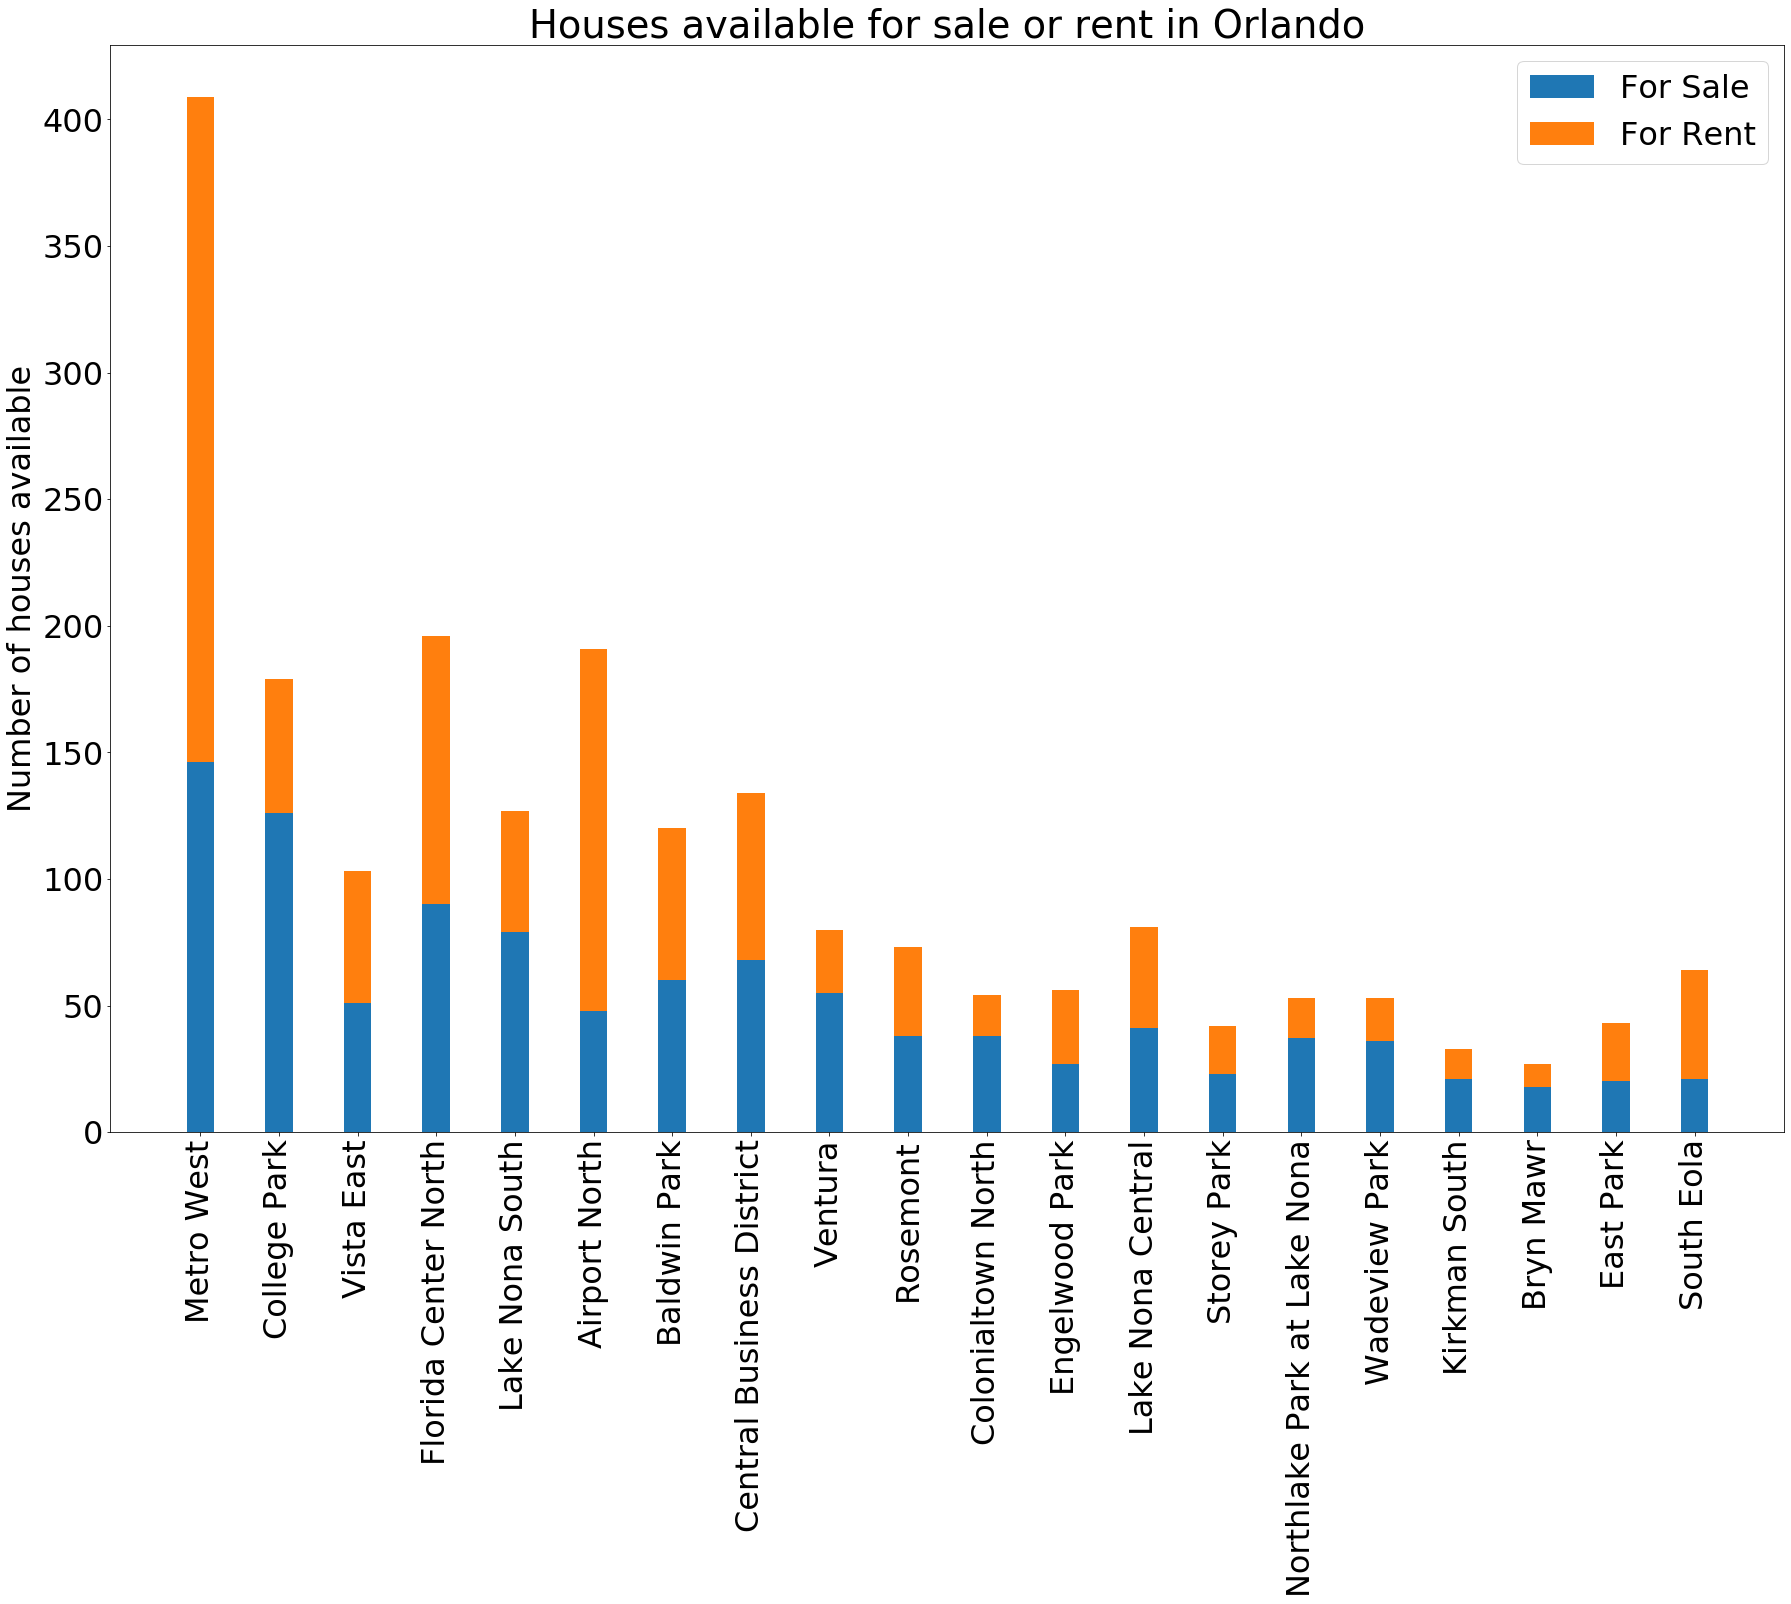

In [187]:
# plotting home availability in each neighborhood

import matplotlib.pyplot as plt

N = 20
plt.figure(figsize=(30, 20))
neigh_homebuy = orl_merged['Homes For Sale']
neigh_homerent = orl_merged['For Rent']
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.rcParams.update({'font.size': 32})
p1 = plt.bar(ind, neigh_homebuy, width)
p2 = plt.bar(ind, neigh_homerent, width,
             bottom=neigh_homebuy)

plt.ylabel('Number of houses available')
plt.title('Houses available for sale or rent in Orlando')
plt.xticks(ind, orl_merged['Neighborhoods'],rotation=90)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('For Sale', 'For Rent'))

plt.show()

In [217]:
print(orl_merged['Homes For Sale'].mean())
print(orl_merged['For Rent'].mean())

52.15
53.75


# Creating the map

In [198]:
# creates threshold scale for Choropleth map

threshold_scale = np.linspace(float(orl_neighborhood1['$/SqFt'].min()),
                              float(orl_neighborhood1['$/SqFt'].max()),
                              4, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

In [199]:
# create map of Orlando using latitude and longitude values
map_orl = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='cartodbpositron')

# Choropleth map for $/SqFt for each neighborhood
map_orl.choropleth(
    geo_data=orl_geo_df,
    data = orl_merged,
    columns = ['Neighborhoods','$/SqFt'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color = 'YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
    highlight=True,
    legend_name='Price per square foot by Neighborhood in Orlando'
    )

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, neighborhood, cluster in zip(orl_merged['Latitude'], orl_merged['Longitude'], orl_merged['Neighborhoods'],orl_merged['Cluster Labels']):
    #label = '{}'.format(neighborhood)
    label = folium.Popup(str(neighborhood) + ', Cluster ' + str(cluster), parse_html=True)
        
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_orl)
    
map_orl

In [200]:
map_orl.save('Orlando-Housing-Map.html')

In [201]:
from IPython.display import HTML
HTML('<iframe src=Orlando-Housing-Map.html width=700 height=600></iframe>')